## Problem

Reference: Example 9.1 in Bathe.

## Solution using central difference

In [48]:
using ONSAS, Plots

In [59]:
# problem formulation
M = [2 0; 0 1.]
K = [6 -2; -2 4.]
C = zeros(2, 2)
R = [0, 10.]
sys = SecondOrderAffineContinuousSystem(M, C, K, R)

U₀ = zeros(2)
U₀′ = zeros(2)
prob = InitialValueProblem(sys, (U₀, U₀′));

In [60]:
# solution
NSTEPS = 2000
sol = ONSAS.solve(prob, CentralDifference(δ=0.01), NSTEPS);

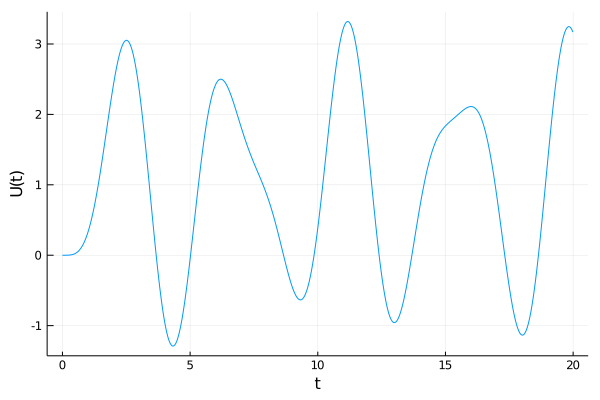

In [61]:
tdom = [0.01 * (i-1) for i in 1:NSTEPS]
plot(tdom, [U[1] for U in sol], xlab="t", ylab="U(t)", lab="")

In [34]:
using BenchmarkTools

In [35]:
@btime solve($prob, CentralDifference(δ=0.01), $NSTEPS);

  1.007 ms (20006 allocations: 2.01 MiB)


## Solution using reachability analysis

In [36]:
using ReachabilityAnalysis

In [66]:
probf = InitialValueProblem(sys, Singleton(zeros(2)) × Singleton(zeros(2)));

solf = ReachabilityAnalysis.solve(probf, tspan=(0 .. 20), alg=GLGM06(δ=0.01));

  0.015346 seconds (60.31 k allocations: 12.977 MiB)


In [67]:
@btime ReachabilityAnalysis.solve($probf, tspan=(0 .. 20), alg=GLGM06(δ=0.01));

  9.655 ms (60314 allocations: 12.98 MiB)


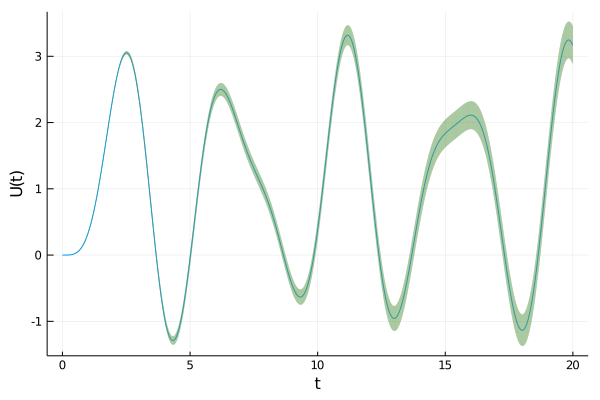

In [64]:
plot!(solf, vars=(0, 1), xlab="t", ylab="U(t)", lab="", lw=0.0, alpha=.5)